# Shapley Tests

In [1]:
# %% Setup
# Imports
# Type imports
from typing import Any, Dict, Tuple

# Standard Libraries
from pathlib import Path
from math import sqrt, pi, sin, cos, tan, radians
from statistics import mean
from itertools import zip_longest

# Shared Packages
import numpy as np
import pandas as pd
import xlwings as xw
import matplotlib.pyplot as plt

#import PySimpleGUI as sg
import pydicom
from shapely.geometry import Polygon
import shapely
from shapely.plotting import plot_polygon, plot_points

import RS_DICOM_Utilities

# Global Settings
PRECISION = 3


In [2]:
def circle_points(radius: float, offset_x: float = 0, offset_y: float = 0,
                  num_points: int = 16, precision=3)->list[tuple[float, float]]:
    deg_step = radians(360/num_points)
    degree_points = np.arange(stop=radians(360), step=deg_step)
    x_coord = np.array([round(radius*sin(d), precision) for d in degree_points])
    y_coord = np.array([round(radius*cos(d), precision) for d in degree_points])

    x_coord = x_coord + offset_x
    y_coord = y_coord + offset_y
    coords = [(x,y) for x,y in zip(x_coord,y_coord)]
    return coords

In [3]:
def box_points(width:float, height: float = None, offset_x: float = 0,
               offset_y: float = 0) -> list[tuple[float, float]]:
    x1_unit = width / 2
    if not height:
        y1_unit = x1_unit
    else:
        y1_unit = height / 2
    coords = [
        ( x1_unit + offset_x,  y1_unit + offset_y),
        ( x1_unit + offset_x, -y1_unit + offset_y),
        (-x1_unit + offset_x, -y1_unit + offset_y),
        (-x1_unit + offset_x,  y1_unit + offset_y)
        ]
    return coords

### Equals

2FFF1FFF2


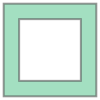

In [4]:
box6 = Polygon(box_points(6))
box4 = Polygon(box_points(4))
hollow_box = shapely.difference(box6, box4)
print(shapely.relate(hollow_box, hollow_box))
hollow_box

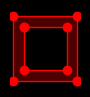

In [5]:
fig = plt.figure(1, figsize=(2,1))
ax = fig.add_subplot(121)
ax.set_axis_off()
ax.axis('equal')
p = plot_polygon(hollow_box, ax=ax, add_points=True, color='red')

### Simple overlap

212111212


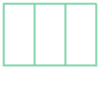

In [6]:
box6 = Polygon(box_points(6))
offset_box6 = Polygon(box_points(6,offset_x=3))
print(shapely.relate(box6, offset_box6))

shapely.union(box6.boundary, offset_box6.boundary)

212101212


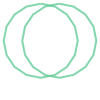

In [7]:
circle_6 = Polygon(circle_points(6))
offset_circle_6 = Polygon(circle_points(6,offset_x=3))
print(shapely.relate(circle_6, offset_circle_6))

shapely.union(circle_6.boundary, offset_circle_6.boundary)

- *2121**1**1212* 
- > ***1*** because the boundaries overlap
- *2121**0**1212* 
- > ***0*** because the boundaries only cross

### Borders 

#### Borders Exterior 

In [8]:
box6_right = Polygon(box_points(6, offset_x=6))
box4_right = Polygon(box_points(4, offset_x=6))
hollow_box_right = shapely.difference(box6_right, box4_right)
#hollow_box_right

In [9]:
box4_inside = Polygon(box_points(2, 3.5, offset_x=-1))
box2_inside = Polygon(box_points(1, 3, offset_x=-1))
hollow_box_inside = shapely.difference(box4_inside, box2_inside)
#hollow_box_inside

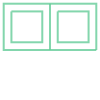

In [10]:
shapely.relate(hollow_box, hollow_box_right)
shapely.union(hollow_box.boundary, hollow_box_right.boundary)

FF2F11212


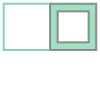

In [11]:
shape = Polygon(hollow_box.exterior)
print(shapely.relate(shape, hollow_box_right))
shapely.union(hollow_box.exterior, hollow_box_right)


FF2FF1212


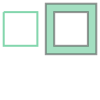

In [12]:
shape = Polygon(hollow_box.interiors[0])
print(shapely.relate(shape, hollow_box_right))
shapely.union(hollow_box.interiors[0], hollow_box_right)


#### Borders Interior 

212F11FF2


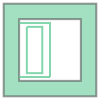

In [13]:
shape = Polygon(hollow_box.interiors[0])
print(shapely.relate(shape, hollow_box_inside))
shapely.union(hollow_box, hollow_box_inside.boundary)


#### Filled Interior

FF2F112F2
212F1FFF2


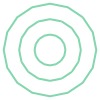

In [14]:
circle_6 = Polygon(circle_points(6))
circle_4 = Polygon(circle_points(4))
circle_2 = Polygon(circle_points(2))
island_shape = shapely.union(shapely.difference(circle_6, circle_4),circle_2)
island_border = shapely.difference(circle_4, circle_2)

print(shapely.relate(island_shape, island_border))

interior = Polygon(island_shape.geoms[0].interiors[0])
print(shapely.relate(interior, island_border))
shapely.union(island_shape.boundary, island_border.boundary)

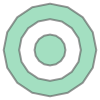

In [15]:
circle_6 = Polygon(circle_points(6))
circle_4 = Polygon(circle_points(4))
circle_2 = Polygon(circle_points(2))
island = shapely.union(shapely.difference(circle_6, circle_4),circle_2)
island

In [16]:
offset_circle_6 = Polygon(circle_points(6,offset_x=6))
offset_circle_4 = Polygon(circle_points(4,offset_x=6))
offset_circle_2 = Polygon(circle_points(2,offset_x=6))
offset_island = shapely.union(shapely.difference(offset_circle_6, offset_circle_4),offset_circle_2)


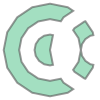

In [17]:
shapely.difference(island, offset_island)

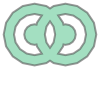

In [18]:
shapely.union(island, offset_island)

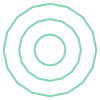

In [19]:
offset_island.boundary

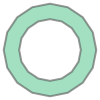

In [20]:
a = [g for g in offset_island.geoms]
a[0]

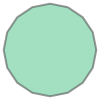

In [21]:
a[1]

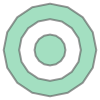

In [22]:
island

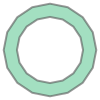

In [23]:
circle_35 = Polygon(circle_points(3.5))
circle_25 = Polygon(circle_points(2.5))
hollow = shapely.difference(circle_35, circle_25)
hollow

FF2FF1212


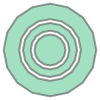

In [24]:
print(shapely.relate(island, hollow))
shapely.union(island, hollow)

212FF1FF2


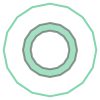

In [25]:
shape = Polygon(island.geoms[0].exterior)
print(shapely.relate(shape, hollow))
shapely.union(island.geoms[0].exterior, hollow)


212FF1FF2


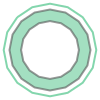

In [26]:
shape = Polygon(island.geoms[0].interiors[0])
print(shapely.relate(shape, hollow))
shapely.union(island.geoms[0].interiors[0], hollow)


FF2FF1212


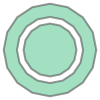

In [27]:
shape = Polygon(island.geoms[1])
print(shapely.relate(shape, hollow))
shapely.union(island.geoms[1], hollow)


# Read Structure with Islands from DICOM


### File Paths

In [28]:
base_path = Path.cwd()
data_path = base_path / 'Test Data'
dicom_path = data_path / r'StructureVolumeTests\SingleContours'

In [29]:
structure_names_file = dicom_path / 'RS.GJS_Struct_Tests.Islands.dcm'

In [30]:
RS_DICOM_Utilities.get_structure_file_info(structure_names_file)

{'PatientName': 'StructureVolumes^Test',
 'PatientLastName': 'StructureVolumes',
 'PatientID': 'GJS_Struct_Tests',
 'StructureSet': 'Islands',
 'StudyID': 'Phantom7',
 'SeriesNumber': '0',
 'File': WindowsPath("d:/OneDrive - Queen's University/Python/Projects/StructureRelations/Test Data/StructureVolumeTests/SingleContours/RS.GJS_Struct_Tests.Islands.dcm")}

In [31]:
dataset = pydicom.dcmread(structure_names_file)

In [32]:
roi_id = RS_DICOM_Utilities.get_names_nums(dataset)
roi_id

1            BODY
14         Island
16    WithIslands
17          Hole1
18        Island1
19          Hole2
20        Island2
Name: StructureID, dtype: object

In [33]:
a = [roi for roi in dataset.ROIContourSequence]

In [34]:
roi = a[2]
structure_num = roi.ReferencedROINumber
hasattr(roi, 'ContourSequence')

True

In [35]:
contours = []
holes = []
for contour_points in roi.ContourSequence:
    points = np.array(contour_points.ContourData).reshape(-1,3)
    points = points / 10  # Convert from mm to cm
    contour = Polygon(points)
    if contour.exterior.is_ccw:
        contours.append(contour)
    else:
        holes.append(contour)

1. sort holes & contours by decreasing area
2. Create polygon from largest contour
3. if next largest is contour and is not contained in polygon combine it otherwise postpone it
4. if next largest is hole and is contained in polygon subtract it otherwise postpone it
5. repeat for all holes & contours, revisiting postponed holes & contours.

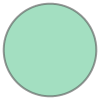

In [36]:
shapely.union_all(contours)


In [37]:
contour_points = b[3]
points = np.array(contour_points.ContourData).reshape(-1,3)
points = points / 10  # Convert from mm to cm
contour = Polygon(points)
contour.exterior.is_ccw

NameError: name 'b' is not defined